In [22]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import seaborn as sns
sns.set_theme()

# Лабораторная работа №4 (вариант 5)

Дана целевая функция 
$$
Q(x, y) = \left( -\left( 1.5(x + 0.5) \right)^2 + y + 2 \right)^2 + y^2
$$
и функции ограничения
$$
g_1(x, y) = -0.2x^2 - y + 0.5,
$$ 
$$
g_2(x,y) = -x-y-1,
$$ 
$$
g_3(x,y)=(x+1.5)^2-(y+1.5)^2+2.
$$  

Поставлена задача
$$
\min_{(x,y)\in D} {Q(x,y)},
$$
где
$$
D = \{ -2 \le x \le 1, \; -1 \le y \le 2 \; | \; g_i(x,y) \le 0, \; i=1,2,3 \}.
$$

In [23]:
lower_bound = [-2, -1]
upper_bound = [1, 2]


def g1(X):
    return -0.2 * X[0] ** 2 - X[1] + 0.5


def g2(X):
    return -X[0] - X[1] - 1


def g3(X):
    return (X[0] + 1.5) ** 2 - (X[1] + 1.5) ** 2 + 2


def g1_eq_zero(x):
    return 0.5 - 0.2 * x ** 2


def g2_eq_zero(x):
    return - 1 - x


def g3_eq_zero(x):
    return -1.5 + np.sqrt((x + 1.5) ** 2 + 2)


def Q(X):
    return (-(1.5 * (X[0] + 0.5)) ** 2 + X[1] + 2) ** 2 + X[1] ** 2

## Визуализация функции и ограничений

Подготовим данные

In [24]:
x = np.linspace(lower_bound[0], upper_bound[0], 1000)
y = np.linspace(lower_bound[1], upper_bound[1], 1000)

X, Y = np.meshgrid(x, y)
Z = Q([X, Y])
G1 = g1([X, Y])
G2 = g2([X, Y])
G3 = g3([X, Y])

Построим график линий уровня (пока без ограничений)

<a list of 15 text.Text objects>

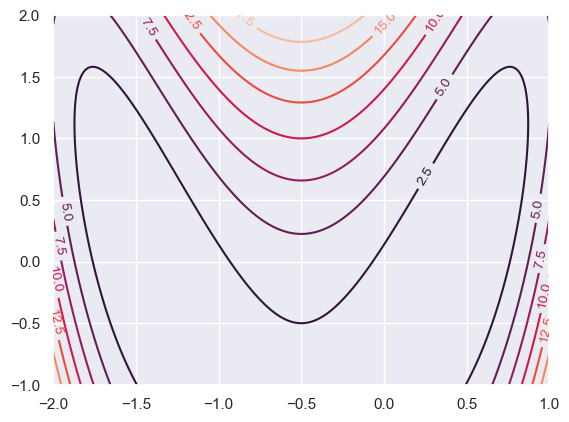

In [25]:
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=True, fontsize=10)

Добавим ограничения-неравенства

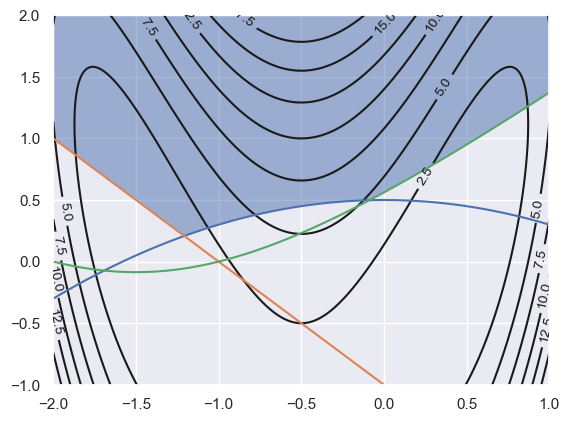

In [26]:
CS = plt.contour(X, Y, Z, colors='k')
plt.clabel(CS, inline=True, fontsize=10)
plt.plot(x, g1_eq_zero(x))
plt.plot(x[:666], g2_eq_zero(x[:666]))
plt.plot(x, g3_eq_zero(x))
plt.fill_between(x, 2, np.maximum(np.maximum(g1_eq_zero(x), g2_eq_zero(x)), g3_eq_zero(x)), alpha=0.5)

Следует рассматривать точки касания и точки пересечения ограничений как точки подозрительные на экстремум. Точки касания качественно оценим, исходя из рисунка. Приблизительно это будут точки: $(-1.6, \; 0.6)$, $(-0.4, \; 0.468)$, $(0.6, \; 1.03)$. Точки пересечения можно найти, приравняв соответствующие ограничения: $(-1.2, \; 0.212)$, $(-0.087, \; 0.5)$.

Отобразим их на графике

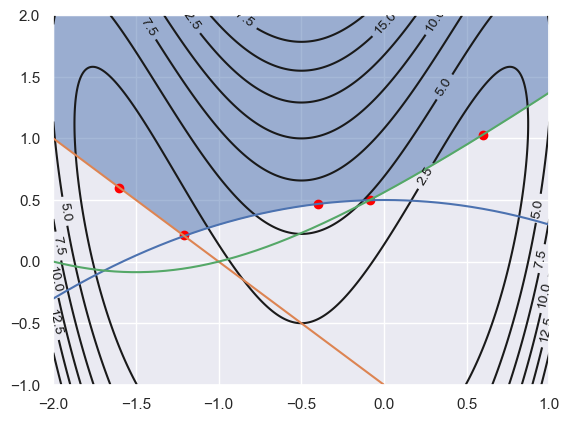

In [27]:
CS = plt.contour(X, Y, Z, colors='k')
plt.clabel(CS, inline=True, fontsize=10)
plt.plot(x, g1_eq_zero(x))
plt.plot(x[:666], g2_eq_zero(x[:666]))
plt.plot(x, g3_eq_zero(x))
plt.fill_between(x, 2, np.maximum(np.maximum(g1_eq_zero(x), g2_eq_zero(x)), g3_eq_zero(x)), alpha=0.5)
plt.scatter(-1.6, 0.6, c='red')
plt.scatter(-0.4, 0.468, c='red')
plt.scatter(0.6, 1.03, c='red')
plt.scatter(-1.21, 0.212, c='red')
plt.scatter(-0.087, 0.5, c='red')

## Поиск решений

Будем численно искать решение с помощью функции minimize из scipy.optimize. Для этого потребуется ввести специальные объекты границ и ограничений. А также задать начальное приближение.

Введём границы $-2 \le x \le 1, \; -1 \le y \le 2$

In [28]:
from scipy.optimize import Bounds
bounds = Bounds(lower_bound, upper_bound)

Определим линейное ограничение $g_2(x,y) = -x-y-1 \le 0$ как $-\infty \le \begin{pmatrix}-1 & -1\end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} \le 1$ 

In [29]:
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([-1, -1], -np.inf, 1)

Создадим нелинейные ограничения $g_1(x, y) = -0.2x^2 - y + 0.5 \le 0$, $g_3(x,y)=(x+1.5)^2-(y+1.5)^2+2 \le 0$ как $\begin{pmatrix} -0.2x^2 - y + 0.5 \\ (x+1.5)^2-(y+1.5)^2+2 \end{pmatrix} \le \begin{pmatrix} 0 \\ 0 \end{pmatrix}$

In [30]:
from scipy.optimize import NonlinearConstraint
nonlinear_constraint = NonlinearConstraint(lambda X: [g1(X), g3(X)], -np.inf, 0)

Зададим пять начальных приближений, распределив их по допустимой области, и посмотрим какие экстремумы будет выдавать

In [31]:
list_x0 = [[-1.6, 0.6], [-1.0, 0.5], [-0.5, 0.5], [0.0, 1.0], [0.5, 1.5]]

По всем выполним поиск

In [32]:
from scipy.optimize import minimize
extr = []
for x0 in list_x0:
    res = minimize(Q, x0, bounds=bounds, constraints=[linear_constraint, nonlinear_constraint],
                   method='trust-constr', options={'disp': True})
    extr.append(res.x)

`gtol` termination condition is satisfied.
Number of iterations: 25, function evaluations: 48, CG iterations: 26, optimality: 3.31e-09, constraint violation: 0.00e+00, execution time: 0.069 s.
`gtol` termination condition is satisfied.
Number of iterations: 19, function evaluations: 39, CG iterations: 21, optimality: 7.88e-09, constraint violation: 0.00e+00, execution time: 0.058 s.
`gtol` termination condition is satisfied.
Number of iterations: 20, function evaluations: 42, CG iterations: 22, optimality: 8.60e-09, constraint violation: 0.00e+00, execution time: 0.067 s.
`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 45, CG iterations: 26, optimality: 5.76e-09, constraint violation: 0.00e+00, execution time: 0.093 s.
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations: 48, CG iterations: 26, optimality: 5.57e-09, constraint violation: 0.00e+00, execution time: 0.09 s.


Видим, что всё отработало успешно. Посмотрим результаты:

In [33]:
extr

[array([-1.52924096,  0.529241  ]),
 array([-1.52924267,  0.52924741]),
 array([-1.52924266,  0.5292474 ]),
 array([0.62446835, 1.05212976]),
 array([0.62446835, 1.05212975])]

Получили две точки локального условного минимума, зафиксируем их

In [34]:
loc_min1 = extr[0]
loc_min2 = extr[4]
loc_min1, loc_min2

(array([-1.52924096,  0.529241  ]), array([0.62446835, 1.05212975]))

Сравним значения функции в этих точках, чтобы понять какая является условным глобальным минимумом

In [35]:
Q(loc_min1), Q(loc_min2)

(0.3013340980416842, 1.1498940893814344)

Первая точка есть условный глобальный минимум

Отобразим эти точки на графике

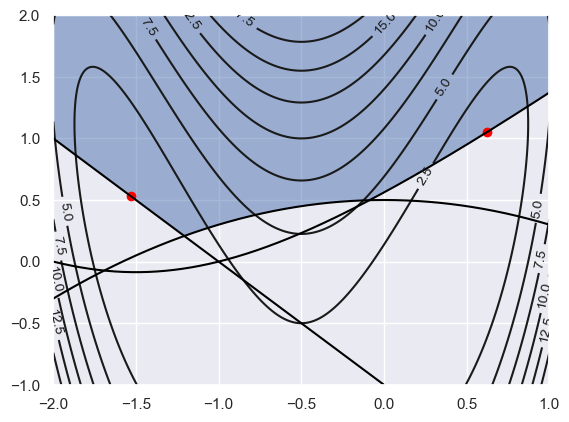

In [36]:
CS = plt.contour(X, Y, Z, colors='k')
plt.clabel(CS, inline=True, fontsize=10)
plt.plot(x, g1_eq_zero(x), color='black')
plt.plot(x[:666], g2_eq_zero(x[:666]), color='black')
plt.plot(x, g3_eq_zero(x), color='black')
plt.fill_between(x, 2, np.maximum(np.maximum(g1_eq_zero(x), g2_eq_zero(x)), g3_eq_zero(x)), alpha=0.5)
plt.scatter(loc_min1[0], loc_min1[1], c='red')
plt.scatter(loc_min2[0], loc_min2[1],  c='red')

## Условия Каруша-Куна-Такера

Создадим переменные

In [37]:
x, y = sp.var('x, y', real=True)

Определим функции

In [38]:
Q = (-(sp.Rational(3, 2) * (x + sp.Rational(1, 2)))**2 + y + 2)**2 + y**2
g1 = -sp.Rational(1, 5) * x**2 - y + sp.Rational(1, 2)
g2 = - x - y - 1
g3 = (x + sp.Rational(3, 2))**2 - (y + sp.Rational(3, 2))**2 + 2

Введём множители и функцию Лагранжа

In [39]:
lam1, lam2, lam3 = sp.symbols('lambda(1:4)', real=True)
L = Q + lam1 * g1 + lam2 * g2 + lam3 * g3

Возьмём градиент функции Лагранжа

In [40]:
gradL = [sp.diff(L, v) for v in (x, y)]

Рассмотрим условия ККТ в первой полученной точке $(-1.52, \; 0.52)$. В ней активно ограничение $g_2$, т.е. $I = \{ 2 \}$. Следовательно, $\lambda_1^*=0$ и $\lambda_3^*=0$. Система векторов градиентов ограничений в этой точке линейно независима, т.к. вектор один и он не нулевой, значит по достаточному условию точка регулярна: $\lambda_0^*=1$. Учтём это и найдём $\lambda_2^*$.

In [41]:
gradL_at_loc_min1 = [gradL_i.subs([(x, loc_min1[0]), (y, loc_min1[1]), (lam1, 0), (lam3, 0)]) for gradL_i in gradL]
sp.nsolve(gradL_at_loc_min1, (lam2,), 0.0, dict=True, prec=8)

[{lambda2: 1.3499478}]

Получили $\lambda_2^* = 1.35 \ge 0$. Мы имеем допустимую точку $(-1.52, \; 0.52)$, а также нетривиальный набор $(\lambda_0^*=1, \; \lambda_1^*=0, \;\lambda_2^*=1.35, \;\lambda_3^*=0)$, где соблюдена неотрицательность $\lambda_i^* \ge 0$. По нему в этой точке градиент функции Лагранжа равен нулю и действуют условия дополняющей нежёсткости. Значит, условия ККТ для первой полученной точки выполнены.

Рассмотрим условия ККТ во второй полученной точке $(0.62, \; 1.05)$. В ней активно ограничение $g_3$, т.е. $I = \{ 3 \}$. Следовательно, $\lambda_1^*=0$ и $\lambda_2^*=0$. Система векторов градиентов ограничений в этой точке линейно независима, т.к. вектор один и он не нулевой, значит по достаточному условию точка регулярна: $\lambda_0^*=1$. Учтём это и найдём $\lambda_3^*$.

In [42]:
gradL_min2 = [gradL_i.subs([(x, loc_min2[0]), (y, loc_min2[1]), (lam1, 0), (lam2, 0)]) for gradL_i in gradL]
sp.nsolve(gradL_min2, (lam3,), 0.0, dict=True, prec=3)

[{lambda3: 0.493}]

Получили $\lambda_3^* = 0.5 \ge 0$. Мы имеем допустимую точку $(0.62, \; 1.05)$, а также нетривиальный набор $(\lambda_0^*=1, \; \lambda_1^*=0, \;\lambda_2^*=0, \;\lambda_3^*=0.5)$, где соблюдена неотрицательность $\lambda_i^* \ge 0$. По нему в этой точке градиент функции Лагранжа равен нулю и действуют условия дополняющей нежёсткости. Значит, условия ККТ для второй полученной точки выполнены.

Вообще говоря, функция и допустимое множество не являются выпуклыми. Следовательно, выполненные условия Каруша-Куна-Такера являются необходимыми.